Iniciamos importando las librerias a utilizar

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [99]:
df = pd.read_csv("wine-reviews.csv", usecols = ('country', 'description', 'points', 'price', 'variety', 'winery' ))

In [100]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [101]:
df = df.dropna(subset=['description', 'points'])

In [102]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


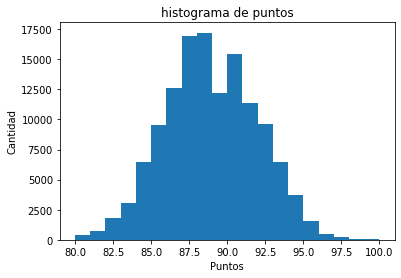

In [103]:
plt.hist(df.points, bins=20)
plt.title("histograma de puntos")
plt.ylabel("Cantidad")
plt.xlabel("Puntos")
plt.show()

In [104]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

In [105]:
train, val, test, = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [106]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [107]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [109]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 3.79405826e-01, -3.42645496e-02, -5.54548502e-02, ...,
        -7.43393898e-02, -1.39339879e-01, -4.75795977e-02],
       [ 4.60362405e-01, -4.58591610e-01, -1.67075813e-01, ...,
         1.10998705e-01, -2.59080797e-01,  4.96889129e-02],
       [ 5.03606796e-01,  2.59478521e-02, -1.13229137e-02, ...,
         6.06847592e-02, -1.71430763e-02,  1.03553966e-01],
       ...,
       [ 5.23771822e-01, -4.12890136e-01, -1.89298615e-01, ...,
        -7.84630328e-03, -8.99285916e-03,  7.57457165e-05],
       [ 2.58974373e-01, -1.99746624e-01, -2.22130612e-01, ...,
        -3.18901725e-02, -8.72325823e-02,  2.04728216e-01],
       [ 4.30177838e-01, -2.03242198e-01, -1.01990126e-01, ...,
        -7.48881102e-02, -9.05531347e-02,  1.34224519e-01]], dtype=float32)>

In [111]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

*texto en cursiva*# Nueva sección

In [114]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [115]:
model.evaluate(train_data)

102/102 [==============================] - 5s 24ms/step - loss: 0.7032 - accuracy: 0.4595


[0.70318204164505, 0.45949065685272217]

In [116]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 25ms/step - loss: 0.7036 - accuracy: 0.4586


[0.7036473751068115, 0.458644300699234]

In [117]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 57s 536ms/step - loss: 0.6172 - accuracy: 0.6414 - val_loss: 0.4885 - val_accuracy: 0.7841
Epoch 2/5
102/102 [==============================] - 53s 523ms/step - loss: 0.4667 - accuracy: 0.7871 - val_loss: 0.3939 - val_accuracy: 0.8201
Epoch 3/5
102/102 [==============================] - 54s 524ms/step - loss: 0.3972 - accuracy: 0.8313 - val_loss: 0.3754 - val_accuracy: 0.8270
Epoch 4/5
102/102 [==============================] - 53s 518ms/step - loss: 0.3636 - accuracy: 0.8476 - val_loss: 0.3704 - val_accuracy: 0.8297
Epoch 5/5
102/102 [==============================] - 53s 515ms/step - loss: 0.3412 - accuracy: 0.8603 - val_loss: 0.3725 - val_accuracy: 0.8290


<function matplotlib.pyplot.show>

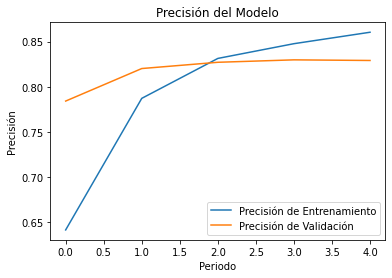

In [118]:
plt.plot(history.history['accuracy'], label="Precisión de Entrenamiento")
plt.plot(history.history['val_accuracy'], label="Precisión de Validación")
plt.title("Precisión del Modelo")
plt.ylabel("Precisión")
plt.xlabel("Periodo")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

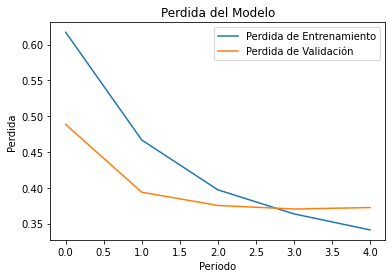

In [119]:
plt.plot(history.history['loss'], label="Perdida de Entrenamiento")
plt.plot(history.history['val_loss'], label="Perdida de Validación")
plt.title("Perdida del Modelo")
plt.ylabel("Perdida")
plt.xlabel("Periodo")
plt.legend()
plt.show

LSTM

In [120]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [121]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

In [126]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = 32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [127]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [128]:
model.evaluate(train_data)
model.evaluate(valid_data)

13/13 [==============================] - 2s 176ms/step - loss: 0.6934 - accuracy: 0.4465


[0.6934028267860413, 0.4464876651763916]

In [129]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 55s 489ms/step - loss: 0.5462 - accuracy: 0.7148 - val_loss: 0.3737 - val_accuracy: 0.8277
Epoch 2/5
102/102 [==============================] - 51s 504ms/step - loss: 0.3682 - accuracy: 0.8366 - val_loss: 0.3498 - val_accuracy: 0.8392
Epoch 3/5
102/102 [==============================] - 50s 487ms/step - loss: 0.3490 - accuracy: 0.8449 - val_loss: 0.3460 - val_accuracy: 0.8391
Epoch 4/5
102/102 [==============================] - 50s 486ms/step - loss: 0.3418 - accuracy: 0.8474 - val_loss: 0.3447 - val_accuracy: 0.8422
Epoch 5/5
102/102 [==============================] - 50s 490ms/step - loss: 0.3360 - accuracy: 0.8493 - val_loss: 0.3448 - val_accuracy: 0.8406
